In [1]:
# Make sure figures appear in the notebook and not in a separate window, and choose their size
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Import necessary libraries, basically random number generators, linear algebra, and plotting tools
import numpy as np 
import numpy.linalg as npl
import numpy.random as npr
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.stats as spst
import itertools as itt
from tools import *
figsize(18,6)

plt.rc('axes', labelsize=22)
plt.rc('legend', fontsize=22)

npr.seed(1)

In [3]:
# Import the tools
from tools import *

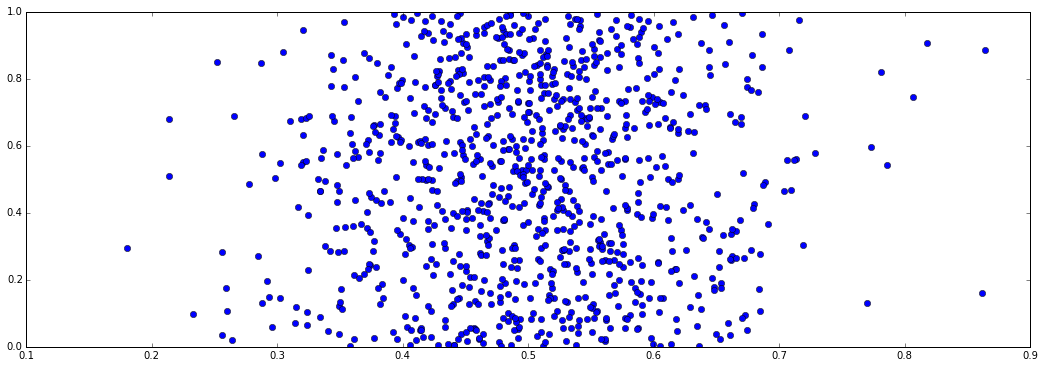

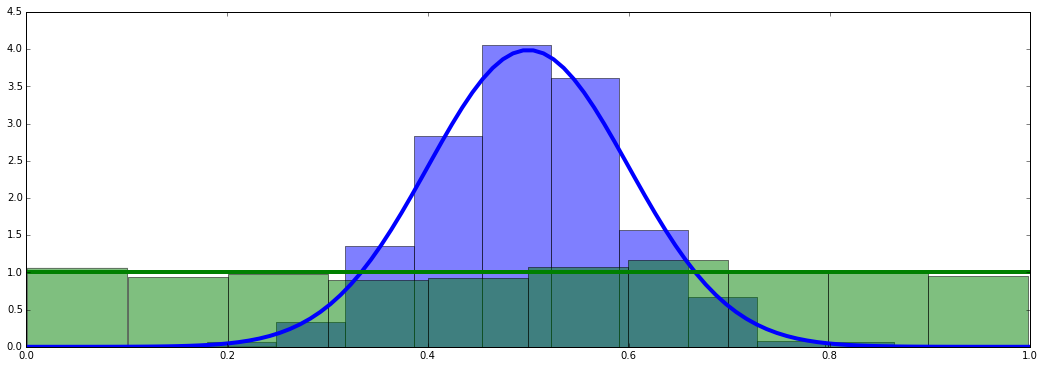

In [4]:
# Demo RS
sigma = .1
target = lambda x: spst.norm(.5,scale=sigma).pdf(x[0]) # Gaussian times uniform target
Z = 1./np.sqrt(2*np.pi*sigma**2)

samples = []
for i in range(1000):
    s, a = rejectionSamplingWithUniformProposal(target, Z, 2, 100)
    samples.append(s)
    if not a:
        print "RS failed"
samples = np.array(samples)

plt.plot(samples[:,0], samples[:,1], 'o')
plt.show()
xPlot = np.linspace(0,1,100)
plt.hist(samples[:,0], color='b', alpha=.5, normed=True)
plt.plot(xPlot, spst.norm(.5, scale=sigma).pdf(xPlot), 'b', linewidth=4)
plt.hist(samples[:,1], color='g', alpha=.5, normed=True)
plt.plot(xPlot, np.ones(xPlot.shape), 'g', linewidth=4)
plt.show()


Note the trick we used to iterate over a grid: (discrete Fourier modes $k_x$ and $k_y$)

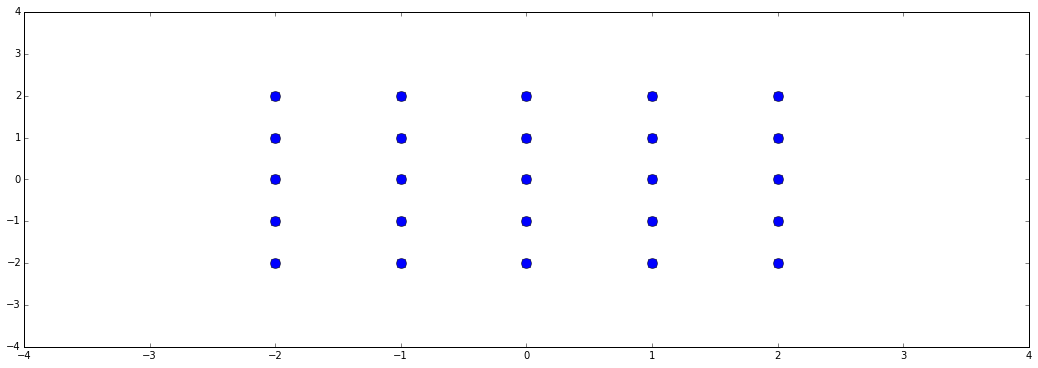

In [5]:
trunc = 2
troncature = 2*trunc+1
L = np.array([np.array(k)-(troncature-1)/2 for k in itt.product(range(troncature), repeat=2)])
plt.plot(L[:,0], L[:,1], 'o', markersize=10)
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.show()

(array([ 98.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([  1.14112637e-15,   4.16519449e-14,   8.21627633e-14,
          1.22673582e-13,   1.63184400e-13,   2.03695219e-13,
          2.44206037e-13,   2.84716856e-13,   3.25227674e-13,
          3.65738493e-13,   4.06249311e-13]),
 <a list of 10 Patch objects>)

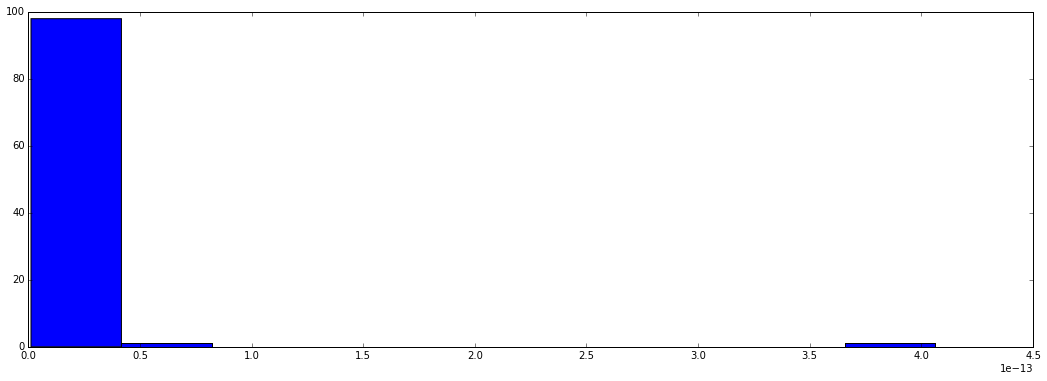

In [6]:
# Let's test Schur inversion of complex matrices
L = []
p = 29
s = 30
for i in range(100):
    K = 10+npr.randn(s,s)+1J*npr.randn(s,s)
    invK = schurInversion(K[:p,:p], K[:p,p:], K[p:,:p], npl.inv(K[p:,p:]))
    L.append(np.max(np.abs(invK-npl.inv(K))))
plt.hist(L)